## **TME 5 - SVM**

Membres du binôme :
- KRISNI Almehdi (3800519)
- ARICHANDRA Santhos (3802651)

In [1]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier 
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

### utils functions

In [2]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def make_grid(data=None,xmin=-5,xmax=5,ymin=-5,ymax=5,step=20):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :param data: pour calcluler les bornes du graphe
    :param xmin: si pas data, alors bornes du graphe
    :param xmax:
    :param ymin:
    :param ymax:
    :param step: pas de la grille
    :return: une matrice 2d contenant les points de la grille
    """
    if data is not None:
        xmax, xmin, ymax, ymin = np.max(data[:,0]),  np.min(data[:,0]), np.max(data[:,1]), np.min(data[:,1])
    x, y =np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step), np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y

def plot_frontiere_proba(data,y,f,step =20):
    ind0 = np.argwhere(y==-1)
    ind1 = np.argwhere(y==1)

    grid,x,y = make_grid(data=data,step=step)
    plt.contourf(x,y,f(grid).reshape(x.shape), 255)
    
    plt.scatter(data[ind0,0], data[ind0,1], c = 'red')
    plt.scatter(data[ind1,0], data[ind1,1], c = 'green')
    plt.show()
    
def gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=0,epsilon=0.02):
    """ Generateur de donnees,
        :param centerx: centre des gaussiennes
        :param centery:
        :param sigma: des gaussiennes
        :param nbex: nombre d'exemples
        :param data_type: 0: melange 2 gaussiennes, 1: melange 4 gaussiennes, 2:echequier
        :param epsilon: bruit dans les donnees
        :return: data matrice 2d des donnnes,y etiquette des donnnees
    """
    if data_type==0:
         #melange de 2 gaussiennes
         xpos=np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex//2)
         xneg=np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex//2)
         data=np.vstack((xpos,xneg))
         y=np.hstack((np.ones(nbex//2),-np.ones(nbex//2)))
    if data_type==1:
        #melange de 4 gaussiennes
        xpos=np.vstack((np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex//4),np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex//4)))
        xneg=np.vstack((np.random.multivariate_normal([-centerx,centerx],np.diag([sigma,sigma]),nbex//4),np.random.multivariate_normal([centerx,-centerx],np.diag([sigma,sigma]),nbex//4)))
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(nbex//2),-np.ones(nbex//2)))

    if data_type==2:
        #echiquier
        data=np.reshape(np.random.uniform(-4,4,2*nbex),(nbex,2))
        y=np.ceil(data[:,0])+np.ceil(data[:,1])
        y=2*(y % 2)-1
    # un peu de bruit
    data[:,0]+=np.random.normal(0,epsilon,nbex)
    data[:,1]+=np.random.normal(0,epsilon,nbex)
    # on mélange les données
    idx = np.random.permutation((range(y.size)))
    data=data[idx,:]
    y=y[idx]
    return data,y.reshape(-1, 1)

### Data 2d and USPS

In [4]:
x2d, y2d = gen_arti(nbex=1000, data_type=1, epsilon=0.4)
#test_x2d, test_y2d  = gen_arti(nbex=500, data_type=1, epsilon=0.4)

train_x, train_y = load_usps( './data/USPS_train.txt' )
test_x, test_y = load_usps( './data/USPS_test.txt' )

## Introduction : Module scikit-learn

In [5]:
p = Perceptron(tol=1e-3, random_state=0)

In [6]:
p.fit(train_x, train_y)

Perceptron()

In [7]:
p.score(test_x, test_y)

0.8958644743398106

In [8]:
t = DecisionTreeClassifier()

In [9]:
t.fit(train_x, train_y)

DecisionTreeClassifier()

In [10]:
t.score(test_x, test_y)

0.8261086198305929

## SVM & Grid Search

### 2D Data

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
SVC2d_linear = SVC(probability=True, kernel='linear')

param_grid  = {'max_iter':[5000,10000,20000],
                'C': np.arange(0,20,2)}

grid = GridSearchCV(SVC2d_linear, param_grid,cv=3, verbose=2)
grid.fit(x2d, y2d)

print(grid.best_params_)
print(grid.best_score_)

# {'C': 10, 'max_iter': 5000}
# 0.6130741519963077

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END .................................C=2, max_iter=5000; total time=   0.0s
[CV] END .................................C=2, max_iter=5000; total time=   0.0s
[CV] END .................................C=2, m

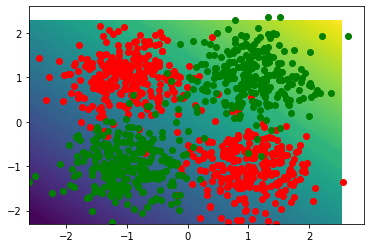

In [13]:
bestSVD2d_linear = SVC(probability=True, C=10, kernel='linear')

bestSVD2d_linear.fit(x2d, y2d)
plot_frontiere_proba(x2d, y2d, lambda x : bestSVD2d_linear.predict_proba(x)[:,0], step=50)

In [14]:
SVC2d_rbf = SVC(probability=True, kernel='rbf')

param_grid  = {'max_iter':[5000,10000,20000],
                'C': np.arange(0,20,2)}

grid = GridSearchCV(SVC2d_rbf, param_grid,cv=3, verbose=2)
grid.fit(x2d, y2d)

print(grid.best_params_)
print(grid.best_score_)

# {'C': 2, 'max_iter': 5000}
# 0.9559949170727613

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END .................................C=2, max_iter=5000; total time=   0.0s
[CV] END .................................C=2, max_iter=5000; total time=   0.0s
[CV] END .................................C=2, m

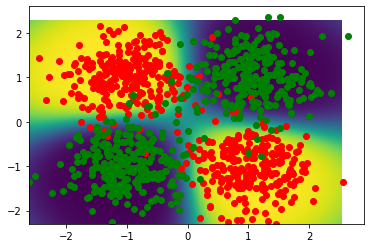

In [15]:
bestSVD2d_rbf = SVC(probability=True, C=2, kernel='rbf')

bestSVD2d_rbf.fit(x2d, y2d)
plot_frontiere_proba(x2d, y2d, lambda x : bestSVD2d_rbf.predict_proba(x)[:,0], step=50)

In [16]:
SVC2d_poly = SVC(probability=True, kernel='poly')

param_grid  = {'max_iter':[5000,10000,20000],
                'C': np.arange(0,20,2)}

grid = GridSearchCV(SVC2d_poly, param_grid,cv=3, verbose=2)
grid.fit(x2d, y2d)

print(grid.best_params_)
print(grid.best_score_)

# {'C': 14, 'max_iter': 10000}
# 0.5920201638764513

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END .................................C=2, max_iter=5000; total time=   0.0s
[CV] END .................................C=2, max_iter=5000; total time=   0.0s
[CV] END .................................C=2, m

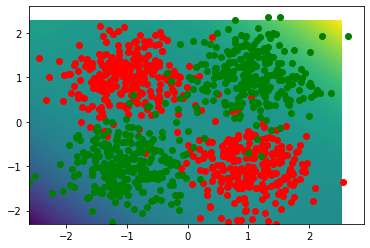

In [17]:
bestSVD2d_poly = SVC(probability=True, C=14, kernel='poly')

bestSVD2d_poly.fit(x2d, y2d)
plot_frontiere_proba(x2d, y2d, lambda x : bestSVD2d_poly.predict_proba(x)[:,0], step=50)

In [18]:
SVC2d_sigmoid = SVC(probability=True, kernel='sigmoid')

param_grid  = {'max_iter':[5000,10000,20000],
                'C': np.arange(0,20,2)}

grid = GridSearchCV(SVC2d_sigmoid, param_grid,cv=3, verbose=2)
grid.fit(x2d, y2d)

print(grid.best_params_)
print(grid.best_score_)

# {'C': 2, 'max_iter': 5000}
# 0.47198695701689714

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END .................................C=0, max_iter=5000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=10000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END ................................C=0, max_iter=20000; total time=   0.0s
[CV] END .................................C=2, max_iter=5000; total time=   0.0s
[CV] END .................................C=2, max_iter=5000; total time=   0.0s
[CV] END .................................C=2, m

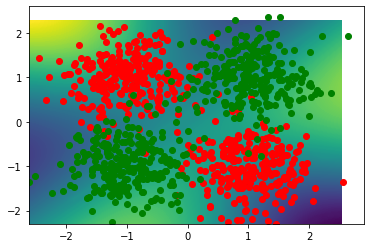

In [19]:
bestSVD2d_sigmoid = SVC(probability=True, C=2, kernel='sigmoid')

bestSVD2d_sigmoid.fit(x2d, y2d)
plot_frontiere_proba(x2d, y2d, lambda x : bestSVD2d_sigmoid.predict_proba(x)[:,0], step=50)

### GridSearch with kernel params

In [20]:
SVC2d = SVC(probability=True, kernel='linear')
param_grid  = {'max_iter':[5000,10000,20000],
                'C': np.arange(0,20,2), 
                'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC2d, param_grid,cv=3, verbose=2)
grid.fit(x2d, y2d)

print(grid.best_params_)
print(grid.best_score_)

# best_params_ : {'C': 2, 'kernel': 'rbf', 'max_iter': 5000}
# best_score_ : 0.9489939040837244

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] END ..................C=0, kernel=linear, max_iter=5000; total time=   0.0s
[CV] END ..................C=0, kernel=linear, max_iter=5000; total time=   0.0s
[CV] END ..................C=0, kernel=linear, max_iter=5000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=10000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=10000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=10000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=20000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=20000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=20000; total time=   0.0s
[CV] END .....................C=0, kernel=rbf, max_iter=5000; total time=   0.0s
[CV] END .....................C=0, kernel=rbf, max_iter=5000; total time=   0.0s
[CV] END .....................C=0, kernel=rbf,

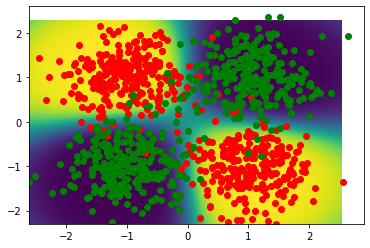

In [21]:
bestSVD2d = SVC(probability=True, C=2, kernel='rbf')

bestSVD2d.fit(x2d, y2d)
plot_frontiere_proba(x2d, y2d, lambda x : bestSVD2d.predict_proba(x)[:,0], step=50)

### USPS Data

In [22]:
SVC = SVC(probability=True, kernel='linear')

param_grid  = {'max_iter':[5000,10000,20000],
                'C': np.arange(0,50,5), 
                'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_usps = GridSearchCV(SVC, param_grid,cv=3, verbose=2)
grid_usps.fit(train_x, train_y)

print(grid.best_params_)
print(grid.best_score_)

# best_params_ : {'C': 20, 'kernel': 'rbf', 'max_iter': 5000}
# best_score_ : 0.9779181119050401

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] END ..................C=0, kernel=linear, max_iter=5000; total time=   0.0s
[CV] END ..................C=0, kernel=linear, max_iter=5000; total time=   0.0s
[CV] END ..................C=0, kernel=linear, max_iter=5000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=10000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=10000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=10000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=20000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=20000; total time=   0.0s
[CV] END .................C=0, kernel=linear, max_iter=20000; total time=   0.0s
[CV] END .....................C=0, kernel=rbf, max_iter=5000; total time=   0.0s
[CV] END .....................C=0, kernel=rbf, max_iter=5000; total time=   0.0s
[CV] END .....................C=0, kernel=rbf,

Le gradSearch nous permet de lancer les modeles avec differents parametres et on voit ici que le meilleur modele pour les donnees USPS sont 
- C = 20
- kernel = rbf

pour un 

## Multi-Classe

### Perceptron

In [23]:
oneVSonePerceptron = OneVsOneClassifier(Perceptron(tol=1e-3, random_state=0))
oneVSonePerceptron.fit(train_x, train_y)

OneVsOneClassifier(estimator=Perceptron())

In [24]:
oneVSonePerceptron.score(test_x, test_y)

0.918784255107125

In [25]:
oneVSAllPerceptron = OneVsRestClassifier(Perceptron(tol=1e-3, random_state=0))
oneVSAllPerceptron.fit(train_x, train_y)

OneVsRestClassifier(estimator=Perceptron())

In [26]:
oneVSAllPerceptron.score(test_x, test_y)

0.885401096163428

### Arbres de decision

In [27]:
oneVSoneTree = OneVsOneClassifier(DecisionTreeClassifier())
oneVSoneTree.fit(train_x, train_y)

OneVsOneClassifier(estimator=DecisionTreeClassifier())

In [28]:
oneVSoneTree.score(test_x, test_y)

0.8849028400597907

In [29]:
oneVSAllTree = OneVsRestClassifier(DecisionTreeClassifier())
oneVSAllTree.fit(train_x, train_y)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [30]:
oneVSAllTree.score(test_x, test_y)

0.7767812655705032

### SVM

In [37]:
import sklearn.svm as svm
oneVSoneSVM = OneVsOneClassifier(svm.SVC(C=20, kernel='rbf', max_iter=5000))
oneVSoneSVM.fit(train_x, train_y)

OneVsOneClassifier(estimator=SVC(C=20, max_iter=5000))

In [38]:
oneVSoneSVM.score(test_x, test_y)

0.9531639262580966

In [39]:
oneVSAllSVM = OneVsRestClassifier(svm.SVC(C=20, kernel='rbf', max_iter=5000))
oneVSAllSVM.fit(train_x, train_y)

OneVsRestClassifier(estimator=SVC(C=20, max_iter=5000))

In [40]:
oneVSAllSVM.score(test_x, test_y)

0.953662182361734

On constate ici, que le one vs one fonctionne bien pour les trois modeles. Concernant le one vs all celui-ci est bien meilleur dans les SVM que dans les deux autres modeles ou le score est bien plus faible que le one vs one.

Donc il est necessaire de tester les 2 approches pour pouvoir trouver la meilleure

## String Kernel

In [41]:
def sous_sequence(string, k=3):
    combs_inds = list(it.combinations(np.arange(len(string)), k))
    combs_strs = list(it.combinations(string, k))
    return [ ( ''.join(combs_strs[i]) , combs_inds[i][k - 1] - combs_inds[i][0] ) for i in range(len(combs_strs)) ]

def string_kernel(seq1, seq2, lamb=0.7, k=2):
    subseq1 = sous_sequence(seq1, k)
    subseq2 = sous_sequence(seq2, k)
    return sum([lamb ** ( s1[1] + s2[1] ) for s1 in subseq1 for s2 in subseq2 if s1[0] == s2[0]])

def matrice_similarite(corpus, lamb=0.7, k=2):
    ind = range(len(corpus))
    return [[string_kernel(corpus[i], corpus[j], lamb, k) for j in ind ] for i in ind ]

In [42]:
# Définition du corpus
corpus = ["the new home has been saled on top forecasts",
          "the home sales rise in july",
           "there is an increase in home sales in july",
           "my dog is beautiful"]


# Affichage de quelques mesures de similarité
print('\nSimilarité entre texte 1 et 2:', string_kernel(corpus[0], corpus[1], k=2) )
print('\nSimilarité entre texte 2 et 3:', string_kernel(corpus[1], corpus[2], k=2) )
print('\nSimilarité entre texte 1 et 4:', string_kernel(corpus[0], corpus[3], k=2) )


Similarité entre texte 1 et 2: 47.683845779767054

Similarité entre texte 2 et 3: 67.2191738093644

Similarité entre texte 1 et 4: 13.979389536527352


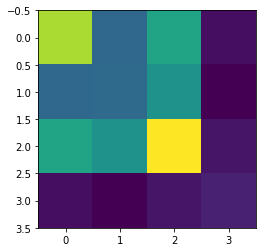

In [43]:
M = matrice_similarite(corpus)
plt.imshow(M)

Nous remarquons ici, que les 3 premiers textes du corpus se ressemblent plus qu'ils ne ressemblent au dernier.